In [1]:
import pandas as pd
import re
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import wandb
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf


In [2]:
data_path = "SoftwareEngineer_cleaned.csv"
df = pd.read_csv(data_path)
print(df.shape)
df.head()

(34012, 12)


,title,level,company,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
0,Software Engineer,SE 2,eBay,5.0,100000,NaN,0,0,0,NaN,CA,San Francisco
1,Software Engineer,60,Microsoft,5.0,157000,NaN,0,0,0,NaN,CA,Mountain View
2,Software Engineer,63,Microsoft,8.5,208000,NaN,0,0,0,NaN,WA,Seattle
3,Software Engineer,62,Microsoft,4.0,156000,NaN,0,0,0,NaN,WA,Seattle
4,Software Engineer,59,Microsoft,3.0,120000,NaN,0,0,0,NaN,WA,Redmond


In [3]:
headers1 = ["company", "yearsofexperience", "Doctorate_Degree", "Masters_Degree", "Bachelors_Degree", "state", "city", "tag", "gender", 'level', "totalyearlycompensation"]
cat = ["company", "state", "city", "tag", "gender", 'level']
df_clean = df[headers1]
df_clean

,company,yearsofexperience,Doctorate_Degree,Masters_Degree,Bachelors_Degree,state,city,tag,gender,level,totalyearlycompensation
0,eBay,5.0,0,0,0,CA,San Francisco,NaN,NaN,SE 2,100000
1,Microsoft,5.0,0,0,0,CA,Mountain View,NaN,NaN,60,157000
2,Microsoft,8.5,0,0,0,WA,Seattle,NaN,NaN,63,208000
3,Microsoft,4.0,0,0,0,WA,Seattle,NaN,NaN,62,156000
4,Microsoft,3.0,0,0,0,WA,Redmond,NaN,NaN,59,120000
...,...,...,...,...,...,...,...,...,...,...,...
34007,Google,10.0,0,0,0,WA,Seattle,Distributed Systems (Back-End),NaN,T4,327000
34008,Microsoft,2.0,0,0,0,WA,Redmond,Full Stack,NaN,62,237000
34009,MSFT,14.0,0,0,0,WA,Seattle,Full Stack,NaN,63,220000
34010,Salesforce,8.0,0,0,0,CA,San Francisco,iOS,NaN,Lead MTS,280000


In [4]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_clean[cat]), index=df_clean.index)

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(cat)
encode_df.head()

C:\Users\pedia\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,company_10x Genomics,company_23andMe,company_2U,company_3M,company_3m,company_7-Eleven,company_7-eleven,company_8x8,company_ABB,company_ADP,...,level_unknown,level_vice president,level_x2,level_x4,level_x5,level_x6,level_x7,level_z4,level_||,level_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_clean = df_clean.merge(encode_df,left_index=True, right_index=True)
df_clean = df_clean.drop(cat,1)
df_clean# Merge one-hot encoded features and drop the originals
df_clean

C:\Users\pedia\AppData\Local\Temp\ipykernel_32724\1232695819.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_clean = df_clean.drop(cat,1)


,yearsofexperience,Doctorate_Degree,Masters_Degree,Bachelors_Degree,totalyearlycompensation,company_10x Genomics,company_23andMe,company_2U,company_3M,company_3m,...,level_unknown,level_vice president,level_x2,level_x4,level_x5,level_x6,level_x7,level_z4,level_||,level_nan
0,5.0,0,0,0,100000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,0,0,0,157000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.5,0,0,0,208000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0,0,0,156000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0,0,0,120000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34007,10.0,0,0,0,327000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34008,2.0,0,0,0,237000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34009,14.0,0,0,0,220000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34010,8.0,0,0,0,280000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Split our preprocessed data into our features and target arrays
y = df_clean.totalyearlycompensation
X = df_clean.drop(columns=["totalyearlycompensation"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.8)

In [7]:
X_train_scaled1 = MinMaxScaler().fit_transform(X_train)
X_test_scaled1 = MinMaxScaler().fit_transform(X_test)
X_train_scaled1

array([[0.51724138, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31034483, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20689655, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.34482759, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13793103, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27586207, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
len(X_train_scaled[0])

4215

In [10]:
#### Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 4500
hidden_nodes_layer2 = 4500
hidden_nodes_layer3 = 1000
hidden_nodes_layer4 = 300

nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# 4th hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn4.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4500)              18972000  
                                                                 
 dense_1 (Dense)             (None, 4500)              20254500  
                                                                 
 dense_2 (Dense)             (None, 1000)              4501000   
                                                                 
 dense_3 (Dense)             (None, 300)               300300    
                                                                 
 dense_4 (Dense)             (None, 1)                 301       
                                                                 
Total params: 44,028,101
Trainable params: 44,028,101
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the model
nn4.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.mean_absolute_percentage_error])

In [12]:
fit_model = nn4.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
851/851 [==============================] - 351s 411ms/step - loss: 8132153344.0000 - mean_absolute_percentage_error: 27.6127
Epoch 2/10
851/851 [==============================] - 345s 406ms/step - loss: 4020572672.0000 - mean_absolute_percentage_error: 20.2079
Epoch 3/10
851/851 [==============================] - 334s 392ms/step - loss: 3363328000.0000 - mean_absolute_percentage_error: 18.1996
Epoch 4/10
851/851 [==============================] - 335s 394ms/step - loss: 3013427200.0000 - mean_absolute_percentage_error: 17.0669
Epoch 5/10
851/851 [==============================] - 344s 404ms/step - loss: 2776553472.0000 - mean_absolute_percentage_error: 16.1848
Epoch 6/10
851/851 [==============================] - 337s 396ms/step - loss: 2611931136.0000 - mean_absolute_percentage_error: 15.5597
Epoch 7/10
851/851 [==============================] - 341s 401ms/step - loss: 2478198016.0000 - mean_absolute_percentage_error: 14.9596
Epoch 8/10
851/851 [============================

In [13]:
# Generate predictions for the test data
y_pred = nn4.predict(X_test_scaled)

# Compare the predictions to the actual values
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

213/213 [==============================] - 7s 34ms/step


In [14]:
predictions_df

,Actual,Predicted
15178,270000,249336.093750
13349,395000,358169.031250
27719,227000,201540.390625
18031,250000,180237.187500
4592,175000,194592.187500
...,...,...
16655,150000,201199.937500
16473,337000,340746.750000
5392,280000,285876.875000
21467,180000,189444.515625


In [15]:
r2_score = r2_score(y_test, y_pred)
print('R2 score:', r2_score)

R2 score: 0.7310596130599827


## Finally i achieved R2 Score 73%


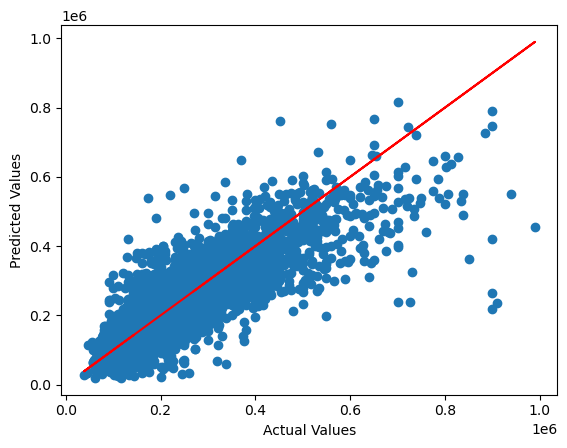

In [17]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)

# Add a line of best fit
plt.plot(y_test, y_test, color = 'red')

# Add axis labels
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.show()

In [19]:
nn4.save('Saved_Models/NeuralNetwork/NNR.h5')